# SECTION 1 PROJECT

### AI_BOOTCAMP_10기_이수철

데이터셋 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd
import numpy as np

# 드라이브에 업로드한 데이터셋 불러오기
df = pd.read_csv('/content/drive/MyDrive/URCLASS/vgames2.csv')

df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [31]:
# 불필요한 첫번째 column 삭제
df_1 = df.iloc[:, 1 : 10]

# column별 결측치 확인 -> Year, Genre, Publisher 열에 결측치 존재
df_1.isnull().sum()

# Publisher 행을 제외한 결측치가 존재하는 행 제거  ->  Publisher의 결측치는 데이터에 영향을 주지 않는다고 판단함.
df_2 = df_1.dropna(axis = 'index', subset = ['Year', 'Genre'])

df_2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [28]:
# column별 결측치 재확인
df_2.isnull().sum()

# df_2['Year'] column에서 결측치 혹은 2자리 숫자인 데이터 수정
def year(x):
  if x < 20:
     return 2000 + x
  elif (x > 20) and (x < 99):
     return 1900 + x
  else:
     return x

df_2['Year'] = df_2['Year'].apply(year)

print(df_2.shape)

print(df_2['Year'].value_counts())

(16277, 9)
2009.0    1428
2008.0    1423
2010.0    1255
2007.0    1196
2011.0    1136
2006.0    1005
2005.0     939
2002.0     826
2003.0     774
2004.0     759
2012.0     654
2015.0     611
2014.0     582
2013.0     545
2001.0     480
1998.0     377
2000.0     348
2016.0     344
1999.0     336
1997.0     289
1996.0     262
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


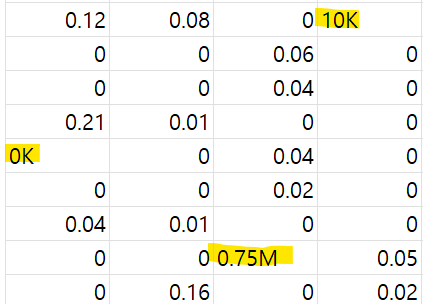

In [5]:
# Sales columns를 필터링 후 단위를 M으로 통일하기 위해, 'K'는 0.001로 변환(곱하기), 'M'은 삭제
df_Sales = df_2.filter(regex="_Sales").replace({'K': 'e-03','M': ''}, regex=True).astype(float)

df_Sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04
...,...,...,...,...
16593,0.15,0.04,0.00,0.01
16594,0.01,0.00,0.00,0.00
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [6]:
# 기존 데이터와 수정된 Sales 데이터 합치기
df_3 = df_2.loc[:, 'Name':'Publisher']

Game_data = df_3.join(df_Sales)

Game_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
# 모든 지역 판매량의 총합 ['Global_Sales'] column 만들기
Game_data['Global_Sales'] = Game_data.iloc[:, 5:9].sum(axis = 1)

Game_data_copy = Game_data.copy()

Game_data_copy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


## 필수 분석 목표 1
##### *지역에 따라서 선호하는 게임 장르가 다를까*

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 게임 장르별 판매 데이터 출력
Sales_by_Genre = Game_data.groupby(['Genre'], axis = 0).sum().reset_index()[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

Sales_by_Genre = Sales_by_Genre.sort_values(by = 'Global_Sales', ascending= False).reset_index(drop=True)

Sales_by_Genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,858.78,513.64,156.61,183.99,1713.02
1,Sports,667.26,370.97,134.76,132.35,1305.34
2,Shooter,574.48,310.23,38.18,101.86,1024.75
3,Role-Playing,318.76,183.10,342.93,56.73,901.52
4,Platform,445.38,200.65,130.53,51.45,828.01
5,Misc,400.29,210.20,104.18,72.74,787.41
6,Racing,354.70,235.03,56.32,76.51,722.56
7,Fighting,220.35,99.90,87.14,36.15,443.54
8,Simulation,181.43,113.17,63.54,31.32,389.46
9,Puzzle,121.58,50.48,56.24,12.44,240.74


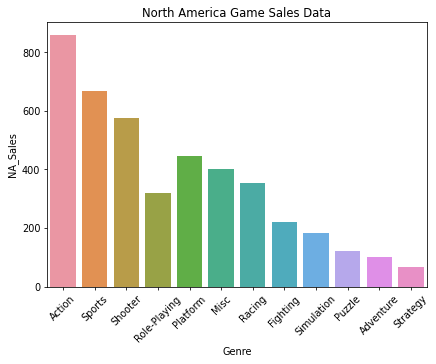

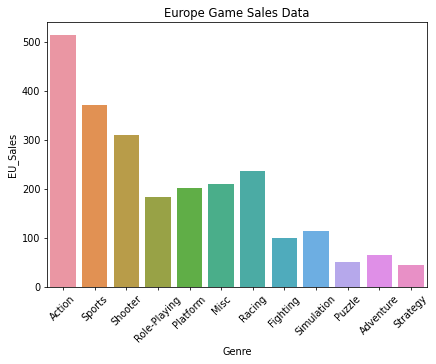

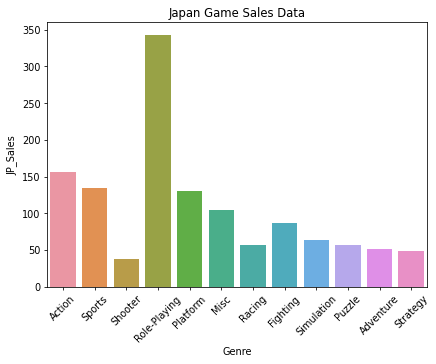

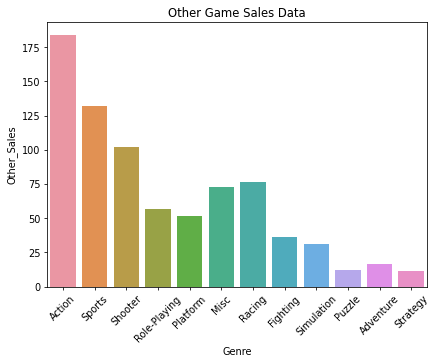

In [9]:
# 위 데이터를 토대로한 barplot을 지역별로 출력
def genre_plots(title, sales):
  plt.figure(figsize = (7,5), dpi = 70)
  plt.title(title)
  plt.xticks(rotation = 45)
  sns.barplot(x = 'Genre', y = sales, data = Sales_by_Genre)
  return plt.show()

genre_plots('North America Game Sales Data', Sales_by_Genre['NA_Sales'])
genre_plots('Europe Game Sales Data', Sales_by_Genre['EU_Sales'])
genre_plots('Japan Game Sales Data', Sales_by_Genre['JP_Sales'])
genre_plots('Other Game Sales Data', Sales_by_Genre['Other_Sales'])


#### ✔ 판매액 기준으로 Action, Sports, Shooter 장르 순으로 많이 팔렸다.
#### ✔ 예외적으로 Japan지역에서는 Role-playing 장르가 가장 많이 팔린 것을 확인할 수 있었다.

## 필수 분석 목표 2
##### *연도별 게임의 트렌드가 있을까*




In [10]:
# 연도별 장르 판매량을 출력
Year_Genre_Sales = Game_data.groupby(by = ['Year', 'Genre'], axis = 0)['Global_Sales'].sum().reset_index()

Sales_by_Year = Year_Genre_Sales.groupby(by = ['Year', 'Genre'], axis = 0)['Global_Sales'].sum().unstack().fillna(0)

Sales_by_Year.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,0.34,0.0,0.77,2.70,0.00,0.00,0.00,0.0,7.07,0.00,0.00,0.0
1981.0,14.79,0.0,0.00,0.00,6.92,2.25,0.48,0.0,10.02,0.44,0.78,0.0
1982.0,6.50,0.0,0.00,0.87,5.03,10.04,1.57,0.0,3.81,0.00,1.06,0.0
1983.0,2.86,0.4,0.00,2.14,6.93,0.78,0.00,0.0,0.49,0.00,3.20,0.0
1984.0,1.85,0.0,0.00,1.45,0.69,3.14,5.95,0.0,31.10,0.00,6.17,0.0


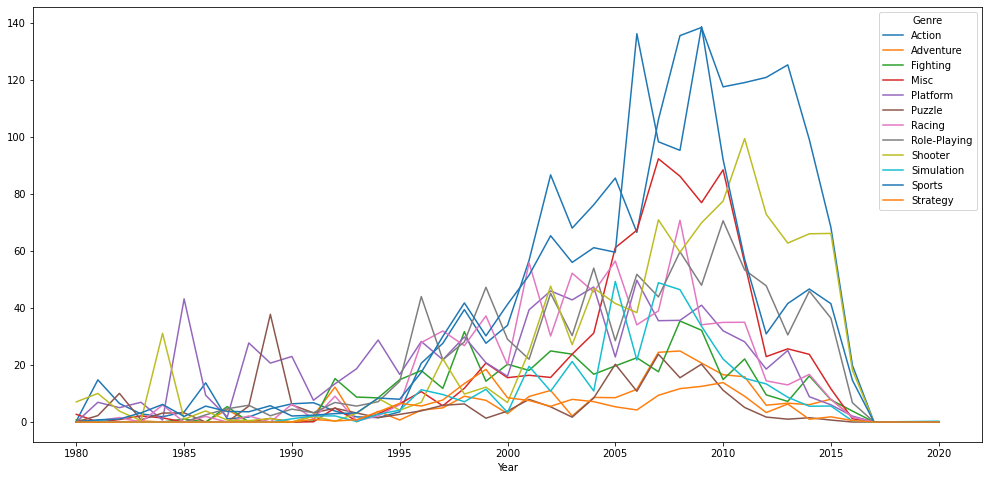

In [11]:
# 연도별 장르 판매량을 시각화
Sales_by_Year.plot(figsize=(17, 8))



*   연도별 게임 장르의 판매량을 시각화하였으나, 알아보기 쉽지 않았다.
*   따라서, 매년 가장 많이 팔린 게임의 장르를 정리해보았다.





In [12]:
# 연도별 가장 높은 판매량을 기록한 장르(글로벌)

Top_Genre_Global = Year_Genre_Sales['Global_Sales'] == Year_Genre_Sales.groupby(['Year'])['Global_Sales'].transform(max)
Year_Genre_Top = Year_Genre_Sales[Top_Genre_Global].reset_index(drop=True)
Year_Genre_Top

,Year,Genre,Global_Sales
0,1980.0,Shooter,7.07
1,1981.0,Action,14.79
2,1982.0,Puzzle,10.04
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10
5,1985.0,Platform,43.17
6,1986.0,Action,13.74
7,1987.0,Fighting,5.42
8,1988.0,Platform,27.73
9,1989.0,Puzzle,37.75




*   1980년부터 2020년의 데이터를 보기에 어려워 10년 단위로 나눠서 장르별 판매  순위를 정리했다.



In [ ]:
f = Game_data_copy.drop(columns = ['Name', 'Platform', 'Publisher'])
f

In [14]:
# 1980년대 장르별 판매량 순위
f_Year1 = (f['Year'] >= float(1980)) & (f['Year'] < float(1990))
filtered_Year1 = f.loc[f_Year1]
filtered_Year_80s = filtered_Year1.groupby('Genre').sum()
f1 = filtered_Year_80s.drop(columns = 'Year').sort_values(by = ['Global_Sales'], ascending = False).reset_index()
f1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Platform,74.34,13.24,32.45,2.23,122.26
1,Puzzle,43.69,5.43,12.47,1.16,62.75
2,Shooter,50.84,2.83,5.30,0.80,59.77
3,Action,37.90,4.29,8.31,0.60,51.10
4,Sports,10.69,2.54,18.20,0.35,31.78
5,Role-Playing,1.06,0.00,12.68,1.51,15.25
6,Racing,6.82,1.36,3.69,0.23,12.10
7,Misc,3.35,0.20,4.86,0.03,8.44
8,Fighting,3.52,0.69,2.92,0.11,7.24
9,Adventure,2.57,0.52,1.61,0.08,4.78


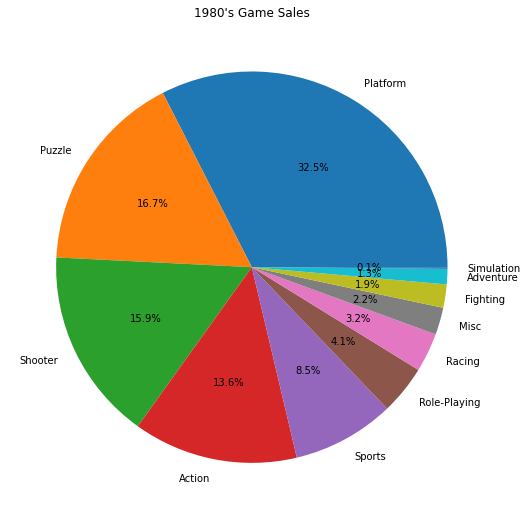

In [15]:
plt.figure(figsize=(9,9))
plt.pie(f1['Global_Sales'], labels = f1['Genre'], autopct= '%.1f%%')
plt.title("1980's Game Sales")
plt.show()



*   80년대에는 Platform 장르가 약 33%의 점유율을 보였다.
*   그 뒤로 Puzzle, Shooter, Action 장르 순으로 인기를 보였다.






In [16]:
# 1990년대 장르별 판매량 순위
f_Year2 = (f['Year'] >= float(1990)) & (f['Year'] < float(2000))
filtered_Year2 = f.loc[f_Year2]
filtered_Year_90s = filtered_Year2.groupby('Genre').sum()
f2 = filtered_Year_90s.drop(columns = 'Year').sort_values(by = ['Global_Sales'], ascending = False).reset_index()
f2

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Platform,112.55,46.15,42.99,7.18,208.87
1,Role-Playing,46.06,32.13,98.31,6.27,182.77
2,Racing,77.05,40.62,24.91,6.23,148.81
3,Sports,70.66,29.18,40.85,5.78,146.47
4,Action,72.94,40.08,19.60,6.53,139.15
5,Fighting,56.21,23.80,39.47,4.03,123.51
6,Shooter,38.76,17.67,10.10,2.36,68.89
7,Misc,30.89,13.68,16.73,2.13,63.43
8,Strategy,21.67,12.24,21.59,2.01,57.51
9,Simulation,17.81,8.58,23.48,2.17,52.04


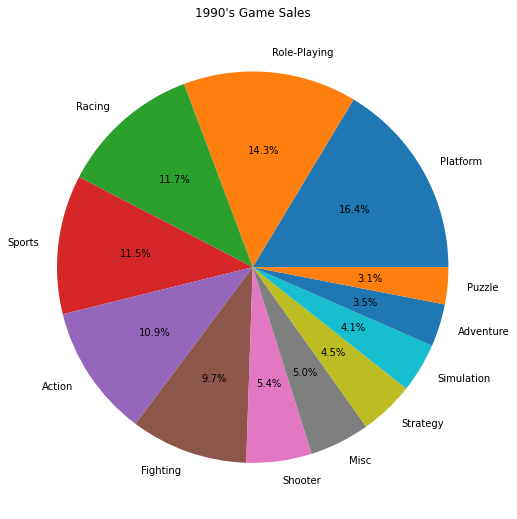

In [17]:
plt.figure(figsize=(9,9))
plt.pie(f2['Global_Sales'], labels = f2['Genre'], autopct= '%.1f%%')
plt.title("1990's Game Sales")
plt.show()



*   90년대에도 Platform장르가 가장 인기있었다.
*   그 뒤로 Role-Playing, Racing, Sports 장르 순으로 인기있었다.
*   특이한 점으로 Role-Playing장르의 Global 판매 절반이 Japan지역에서 발생했다.





In [18]:
# 2000년대 장르별 판매량 순위
f_Year3 = (f['Year'] >= float(2000)) & (f['Year'] < float(2010))
filtered_Year3 = f.loc[f_Year3]
filtered_Year_00s = filtered_Year3.groupby('Genre').sum()
f3 = filtered_Year_00s.drop(columns = 'Year').sort_values(by = ['Global_Sales'], ascending = False).reset_index()
f3

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,461.51,234.28,58.31,99.03,853.13
1,Sports,431.88,223.62,60.37,86.94,802.81
2,Misc,242.82,131.90,61.14,50.38,486.24
3,Racing,225.21,137.53,21.07,54.19,438.00
4,Shooter,257.25,123.29,9.24,43.67,433.45
5,Role-Playing,169.24,81.26,135.84,25.86,412.20
6,Platform,203.02,102.57,39.34,31.20,376.13
7,Simulation,136.51,79.14,26.86,23.13,265.64
8,Fighting,122.06,54.64,31.00,23.56,231.26
9,Adventure,61.90,30.94,21.67,9.26,123.77


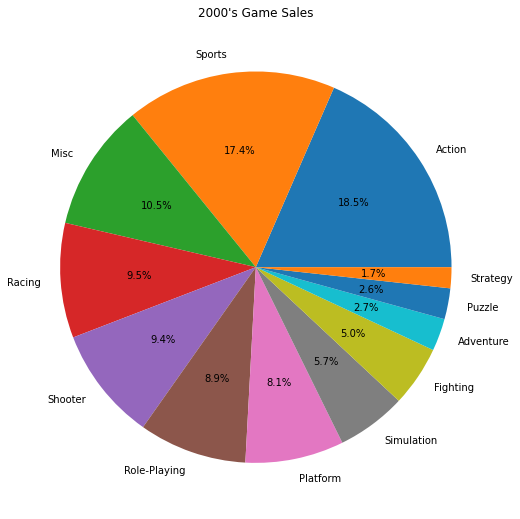

In [19]:
plt.figure(figsize=(9,9))
plt.pie(f3['Global_Sales'], labels = f3['Genre'], autopct= '%.1f%%')
plt.title("2000's Game Sales")
plt.show()



*   2000년대에는 Action, Sports, Misc(기타) 장르 순으로 인기가 있었다.
*   80년대와 90년대의 Platform 장르의 인기와는 다르게 다른 양상을 보였다.
*   90년대 대비 Platform의 점유율은 절반 가량줄어 약 8%를 차지했다.


In [20]:
# 2010년대 장르별 판매량 순위
f_Year4 = (f['Year'] >= float(2010)) & (f['Year'] < float(2020))
filtered_Year4 = f.loc[f_Year4]
filtered_Year_10s = filtered_Year4.groupby('Genre').sum()
f4 = filtered_Year_10s.drop(columns = 'Year').sort_values(by = ['Global_Sales'], ascending = False).reset_index()

f4

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,286.43,234.99,70.39,77.83,669.64
1,Shooter,227.63,166.44,13.54,55.03,462.64
2,Sports,154.03,115.63,15.34,39.28,324.28
3,Role-Playing,102.40,69.71,96.10,23.09,291.30
4,Misc,123.23,64.42,21.45,20.20,229.30
5,Racing,45.62,55.52,6.65,15.86,123.65
6,Platform,55.47,38.69,15.75,10.84,120.75
7,Fighting,38.56,20.77,13.75,8.45,81.53
8,Simulation,26.42,25.38,13.20,5.98,70.98
9,Adventure,20.64,19.07,15.32,5.84,60.87


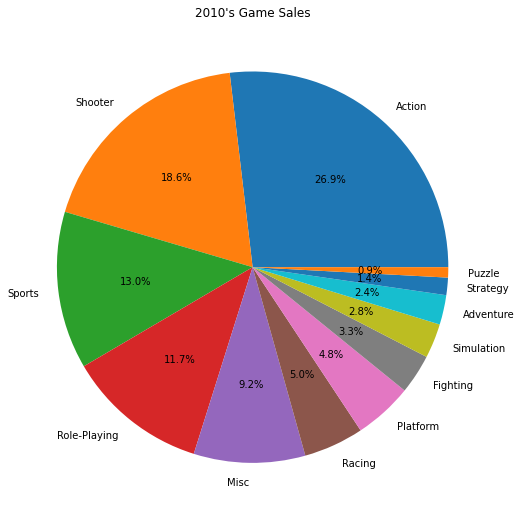

In [21]:
plt.figure(figsize=(9,9))
plt.pie(f4['Global_Sales'], labels = f4['Genre'], autopct= '%.1f%%')
plt.title("2010's Game Sales")
plt.show()



*   2010년대에는 Action 장르가 전체 판매율의 약 27%로 80,90년대에 비해 2배 이상 성장했다.
*   그 뒤를 이어 Shooter(18.6%), Sports(13%), Role-Playing(11.7%) 장르 순으로 높은 판매량을 보여줬다.
*   상위 4개의 장르가 전체 판매량의 70%를 차지했다.
*   Role-playing장르가 Japan 지역 외 에서도 수요가 증가했다.
*   Platform 장르는 2000년대에 비해 점유율 4%가 감소했다. 



#### ✔ 1980~90년대에는 Platform 장르의 수요가 높았다면, 
#### ✔ 2000년대에 들어서는 Action, Shooter 장르의 수요가 높았다.


## 필수 분석 목표 3
##### *출고량이 높은 게임에 대한 분석 및 시각화*

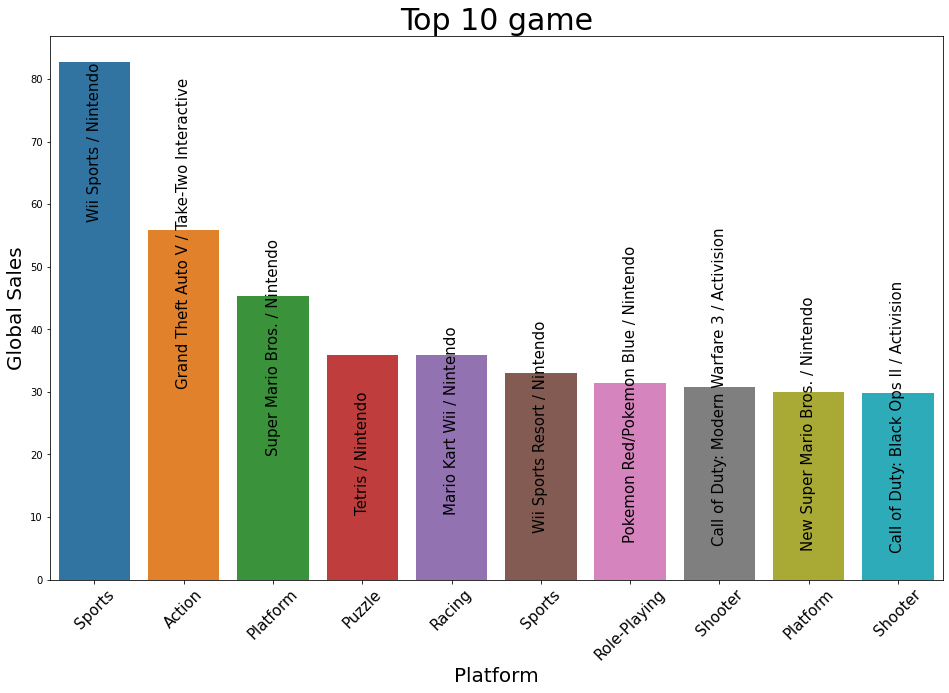

In [22]:
# 글로벌 판매 기준 Top10 게임 

# Platform은 다르지만 Name이 같은 게임들을 묶어주는 작업 실시
Game_data_sort1 = Game_data[['Name', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

Game_data_sort11 = Game_data_sort1.groupby(by = ['Name', 'Genre', 'Publisher'], axis = 0)['Global_Sales'].sum().reset_index()

Best_Game = Game_data_sort11.sort_values(by=['Global_Sales'], ascending = False).reset_index(drop = True)

Best_Game_10 = Best_Game[:10]


# 시각화
b_name = Best_Game_10['Name']
b_publisher = Best_Game_10['Publisher']
y = np.arange(0, 10)

plt.figure(figsize = (16, 10))
b = sns.barplot(x='Name', y='Global_Sales', data = Best_Game_10)
index = 0
for v in Best_Game_10['Global_Sales']:
  b.text(index, v - 25, b_name[index] + ' / '+ b_publisher[index], color='#000', size = 15, rotation = 90, ha = 'center')
  index += 1

plt.title("Top 10 game", fontsize = 30)
plt.xticks(y, Best_Game_10['Genre'], fontsize = 15, rotation = 45)
plt.xlabel("Platform", fontsize = 20)
plt.ylabel("Global Sales", fontsize = 20)
plt.show()




*   전세계에서 가장 출고량이 높은 게임 1위는 Wii Sports (장르 Sports), 2위 Grand Theft Auto V(장르 Action), 3위 Super Mario Bros.(장르 Platform)순이다.
*   순위 내 게임들의 Publisher는 Nintendo가 주를 이뤘다.



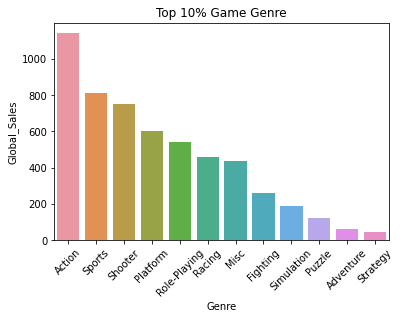

In [225]:
# 판매량 상위 10%(1,100개) 게임의 장르별 판매량
Best_Game_1100 = Best_Game[:1100]

Top_100_Sales_Genre = Best_Game_1100.groupby(by = ['Genre'], axis = 0)['Global_Sales'].sum().reset_index()

Top_100_Sales_Genre = Top_100_Sales_Genre.sort_values(by=['Global_Sales'], ascending = False).reset_index(drop = True)

Top_100_Sales_Genre

# 시각화
sns.barplot(x = 'Genre', y = 'Global_Sales', data = Top_100_Sales_Genre)
plt.xticks(rotation = 45)
plt.title('Top 10% Game Genre')
plt.show()

 *   앞서 가장 높은 판매량을 보인 게임 상위 10개는 Sports, Platform, Puzzle, Racing 등의 장르가 높은 순위에 있었다.
 *   분석 목표 1,2에서 도출한 내용처럼 판매량 상위 10% 게임은 2000년대 들어서 Action, Shooter 장르의 인기가 상위를 차지했기 때문에 추가 분석이 필요했다.


In [24]:
# 가장 많이 팔린 게임 상위 10% 게임 중 2010년 이후 출시된 게임
Game_data_sort2 = Game_data_sort1[Game_data_sort1['Year'] >= 2010]
Game_data_sort2 = Game_data_sort2.groupby(by = ['Name', 'Genre','Publisher'], axis = 0)['Global_Sales'].sum().reset_index()
Game_data_sort2 = Game_data_sort2.sort_values(by=['Global_Sales'], ascending = False).reset_index(drop = True)

Game_data_sort2[:20]

,Name,Genre,Publisher,Global_Sales
0,Grand Theft Auto V,Action,Take-Two Interactive,55.92
1,Call of Duty: Modern Warfare 3,Shooter,Activision,30.84
2,Call of Duty: Black Ops II,Shooter,Activision,29.73
3,Call of Duty: Black Ops,Shooter,Activision,29.41
4,Call of Duty: Ghosts,Shooter,Activision,27.37
5,Call of Duty: Black Ops 3,Shooter,Activision,25.30
6,Call of Duty: Advanced Warfare,Shooter,Activision,21.89
7,Kinect Adventures!,Misc,Microsoft Game Studios,21.82
8,The Elder Scrolls V: Skyrim,Role-Playing,Bethesda Softworks,19.28
9,FIFA 15,Sports,Electronic Arts,19.02




*   2010년대 판매량 상위 10%의 데이터에서Action이 제일 높고 Shooter, Sports 순이었다.
*   Call of Duty나 FIFA 같은 게임 시리즈가 주를 이루는 것이 특이했다.





In [26]:
# 2010년대 판매량 10% 게임 중 퍼블리셔를 순위로 출력 
Publisher_2010s = Game_data_sort2.groupby(by = ['Publisher'], axis = 0)['Global_Sales'].sum().reset_index()

Publisher_2010s = Publisher_2010s.sort_values(by = ['Global_Sales'], ascending = False).reset_index(drop = True)

Publisher_2010s_top20 = Publisher_2010s[:20]

Publisher_2010s_top20

,Publisher,Global_Sales
0,Electronic Arts,360.39
1,Activision,294.41
2,Nintendo,278.25
3,Ubisoft,220.14
4,Take-Two Interactive,176.06
5,Microsoft Game Studios,123.87
6,Sony Computer Entertainment,121.91
7,Warner Bros. Interactive Entertainment,113.96
8,Namco Bandai Games,95.29
9,Square Enix,76.93




*   2010년대 판매량 상위 10%의 데이터에서는 Electronic Arts,  Activision, Nintendo 사 순서로 매출이 높았다.



#### ✔ 2010년대 Action, Shooter, Sports 장르의 인기를 이끈 게임은 GTA, Call of Duty, FIFA같은 시리즈 게임이었다.
#### ✔ Electronic Arts, Activision, Nintendo, Ubisoft 같은 대형 게임 회사들의 매출이 눈에 띄게 높았다.
#### ✔ Grand Theft Auto V의 눈에 띄는 판매량을 제외하면 10년간 꾸준하게 많이 팔린 게임은 Shooter장르의 Call of Duty 시리즈와 Sports 장르의 FIFA 시리즈라고 할 수 있다.

# 결론
### 다음 분기에 어떤 게임을 설계해야 할까?

#### ✔  Shooter, Sports 장르에서 10년 이상 전개할 수 있는 시리즈물을 계획한다.
